In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os

/home/myeongseob/anaconda3/envs/msPro-trex/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
convex_fmnist_indices = np.load('./saved_scores/fmnist_removeone/ours_indices_fmnist.npy')
convex_mnist_indices = np.load('./saved_scores/mnist_removeone/ours_indices_mnist.npy')
convex_cifar10_indices = np.load('./saved_scores/cifar10_removeone/ours_indices_cifar10.npy')

In [3]:
# Assuming all files are in the current directory
# Fetch all the file names
dual_files = sorted([f for f in os.listdir('./saved_scores/mnist_removeone/') if f.startswith('dual_loo_score') and f.endswith('.npy')])
loo_files = sorted([f for f in os.listdir('./saved_scores/mnist_removeone/') if f.startswith('loo_score') and f.endswith('.npy')])

# Ensure that the number of dual_score files matches the number of loo_score files
assert len(dual_files) == len(loo_files), "The number of dual_score and loo_score files should be the same"

In [5]:
# Assuming all files are in the current directory
# Fetch all the file names
fmnist_dual_files = sorted([f for f in os.listdir('./saved_scores/fmnist_removeone/') if f.startswith('dual_loo_score') and f.endswith('.npy')])
fmnist_loo_files = sorted([f for f in os.listdir('./saved_scores/fmnist_removeone/') if f.startswith('loo_score') and f.endswith('.npy')])

# Ensure that the number of dual_score files matches the number of loo_score files
assert len(fmnist_dual_files) == len(fmnist_loo_files), "The number of dual_score and loo_score files should be the same"

In [7]:
# Assuming all files are in the current directory
# Fetch all the file names
cifar10_dual_files = sorted([f for f in os.listdir('./saved_scores/cifar10_removeone/') if f.startswith('dual_loo_score') and f.endswith('.npy')])
cifar10_loo_files = sorted([f for f in os.listdir('./saved_scores/cifar10_removeone/') if f.startswith('loo_score') and f.endswith('.npy')])

# Ensure that the number of dual_score files matches the number of loo_score files
assert len(cifar10_dual_files) == len(cifar10_loo_files), "The number of dual_score and loo_score files should be the same"

In [ ]:
file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in dual_files}
dual_sorted_files = [file_mapping[num] for num in convex_mnist_indices[:10] if num in file_mapping]
print(dual_sorted_files)

file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in loo_files}
loo_sorted_files = [file_mapping[num] for num in convex_mnist_indices[:10] if num in file_mapping]

In [ ]:
file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in fmnist_dual_files}
fmnist_dual_sorted_files = [file_mapping[num] for num in convex_fmnist_indices[:10] if num in file_mapping]
print(fmnist_dual_sorted_files)

file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in fmnist_loo_files}
fmnist_loo_sorted_files = [file_mapping[num] for num in convex_fmnist_indices[:10] if num in file_mapping]

In [ ]:
file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in cifar10_dual_files}
cifar10_dual_sorted_files = [file_mapping[num] for num in convex_cifar10_indices[:10] if num in file_mapping]
print(cifar10_dual_sorted_files)

file_mapping = {int(f.split('_')[-1].split('.')[0]): f for f in cifar10_loo_files}
cifar10_loo_sorted_files = [file_mapping[num] for num in convex_cifar10_indices[:10] if num in file_mapping]

In [12]:
# Initialize a list to keep all the correlation coefficients
cor_score_lst = []
cor_score_lst_spearman = []
# Loop through the files and perform the operations
from scipy.stats import spearmanr

for dual_file, loo_file in zip(dual_sorted_files, loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/mnist_removeone/' + dual_file
    loo_filename = './saved_scores/mnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(dual_loo_score, loo_score)
    cor_score_lst.append(correlation_coefficient)
    spearman_corr, _ = spearmanr(dual_loo_score, loo_score)
    cor_score_lst_spearman.append(spearman_corr)
    # Print the correlation coefficient
    print(f"Correlation Coefficient for {dual_file} vs {loo_file}: {correlation_coefficient}")

    # scatter plot
    plt.scatter(dual_loo_score, loo_score, c='0.6', marker='o', label='values')
    plt.xlabel('Dual LOO')
    plt.ylabel('LOO')
    plt.title(f'LOO vs Dual LOO for {dual_file} and {loo_file}')
    plt.legend()
    
    # Save the plot
    plot_filename = f'./saved_figures/convex_mnist_loo_vs_dualloo_plot_{dual_file}.png'
    plt.savefig(plot_filename)
    plt.close()

# Calculate the average correlation coefficient over all samples
average_correlation = np.mean(cor_score_lst)
print("Average Correlation Coefficient:", average_correlation)
average_spearman_correlation = np.mean(cor_score_lst_spearman)
print("Average Correlation Coefficient:", average_spearman_correlation)

Correlation Coefficient for dual_loo_score_4008.npy vs loo_score_4008.npy: 0.9966236086902902
Correlation Coefficient for dual_loo_score_2049.npy vs loo_score_2049.npy: 0.9970661236892624
Correlation Coefficient for dual_loo_score_1707.npy vs loo_score_1707.npy: 0.997723718426261
Correlation Coefficient for dual_loo_score_4155.npy vs loo_score_4155.npy: 0.9978889865524916
Correlation Coefficient for dual_loo_score_3625.npy vs loo_score_3625.npy: 0.9986095864415052
Correlation Coefficient for dual_loo_score_786.npy vs loo_score_786.npy: 0.9978337805580555
Correlation Coefficient for dual_loo_score_1882.npy vs loo_score_1882.npy: 0.9976776832649283
Correlation Coefficient for dual_loo_score_4780.npy vs loo_score_4780.npy: 0.9978805979860899
Correlation Coefficient for dual_loo_score_2025.npy vs loo_score_2025.npy: 0.9966088416651852
Correlation Coefficient for dual_loo_score_1251.npy vs loo_score_1251.npy: 0.9966925169773168
Average Correlation Coefficient: 0.9974605444251387
Average Cor

Correlation Coefficient for dual_loo_score_4008.npy vs loo_score_4008.npy: 0.9966236086902902


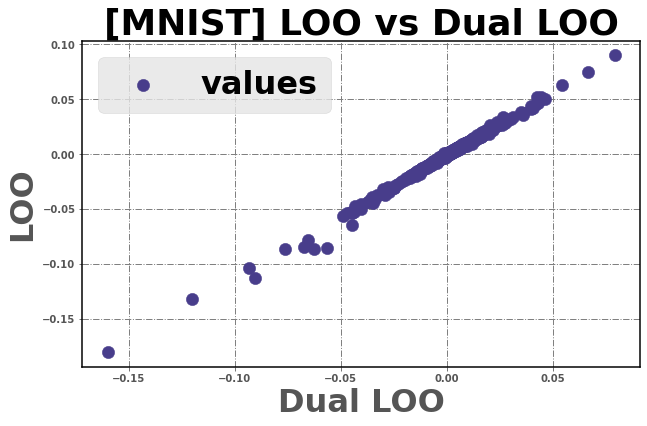

Correlation Coefficient for dual_loo_score_2049.npy vs loo_score_2049.npy: 0.9970661236892624


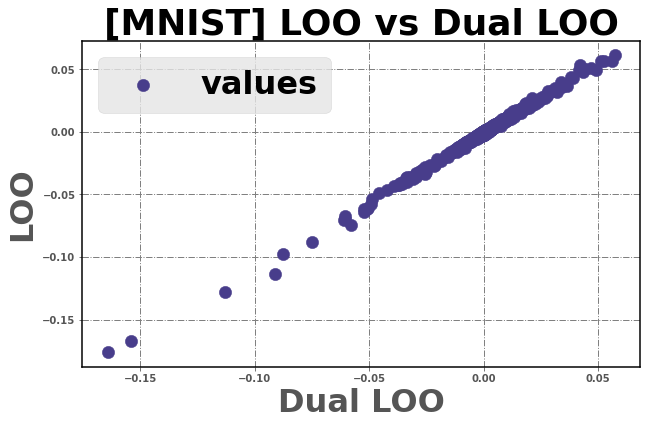

Correlation Coefficient for dual_loo_score_1707.npy vs loo_score_1707.npy: 0.997723718426261


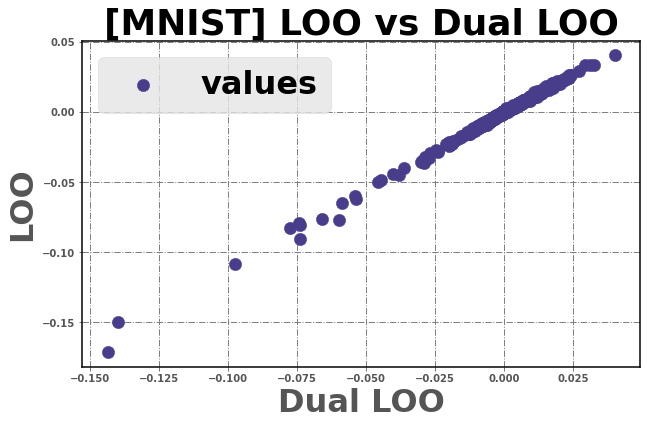

Correlation Coefficient for dual_loo_score_4155.npy vs loo_score_4155.npy: 0.9978889865524916


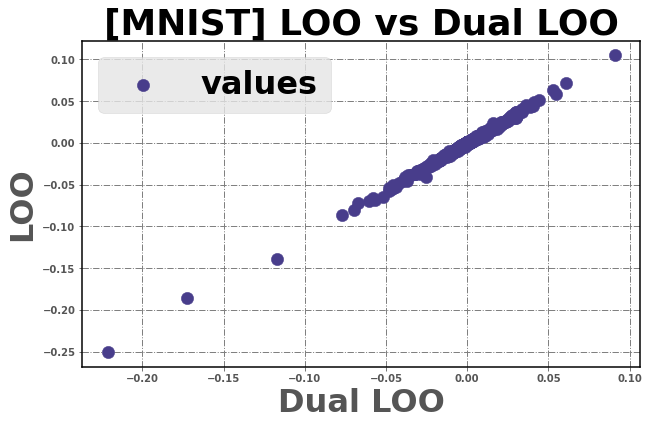

Correlation Coefficient for dual_loo_score_3625.npy vs loo_score_3625.npy: 0.9986095864415052


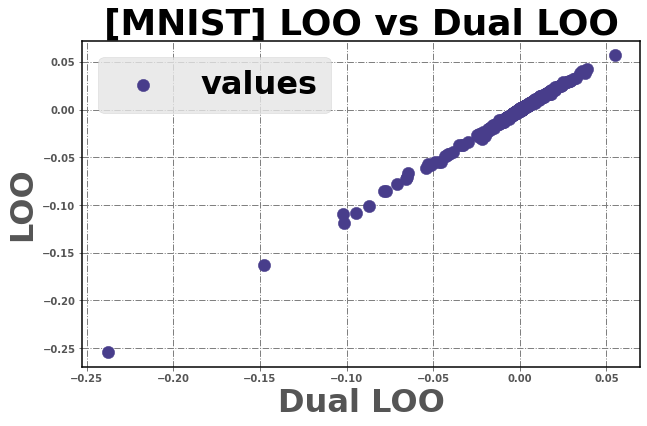

Correlation Coefficient for dual_loo_score_786.npy vs loo_score_786.npy: 0.9978337805580555


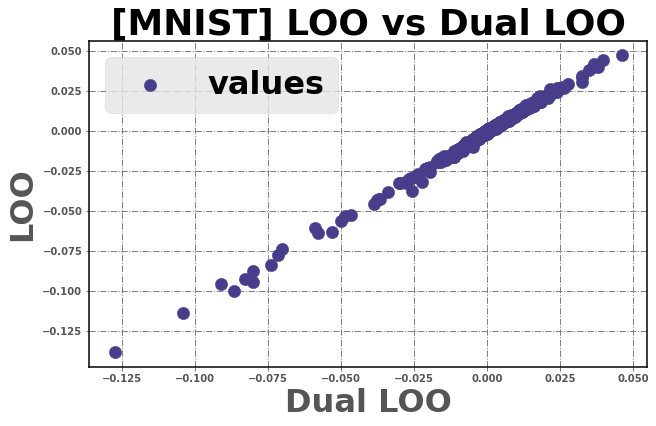

Correlation Coefficient for dual_loo_score_1882.npy vs loo_score_1882.npy: 0.9976776832649283


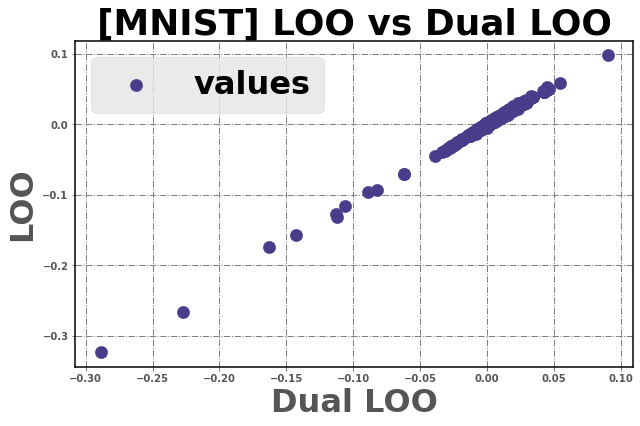

Correlation Coefficient for dual_loo_score_4780.npy vs loo_score_4780.npy: 0.9978805979860899


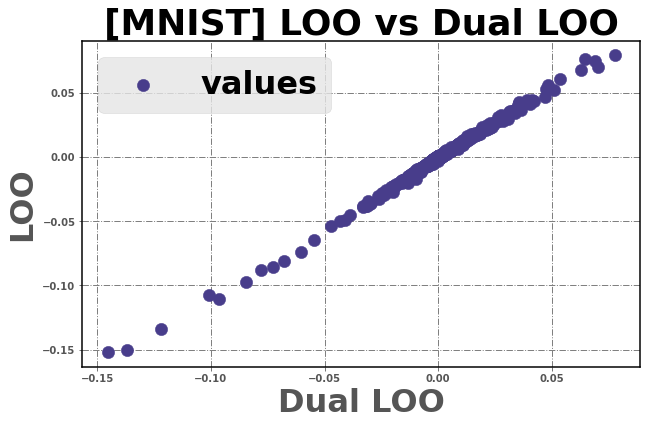

Correlation Coefficient for dual_loo_score_2025.npy vs loo_score_2025.npy: 0.9966088416651852


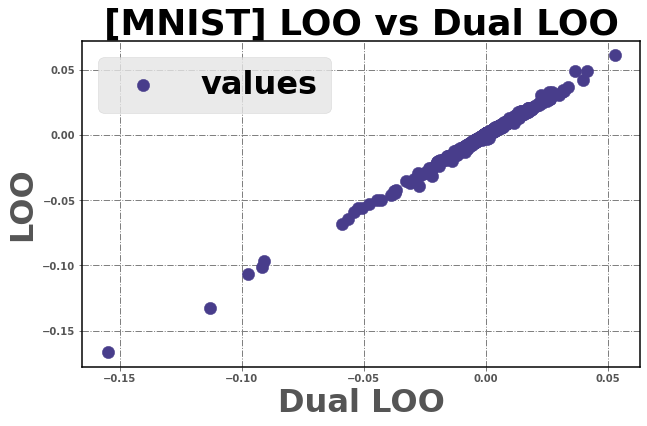

Correlation Coefficient for dual_loo_score_1251.npy vs loo_score_1251.npy: 0.9966925169773168


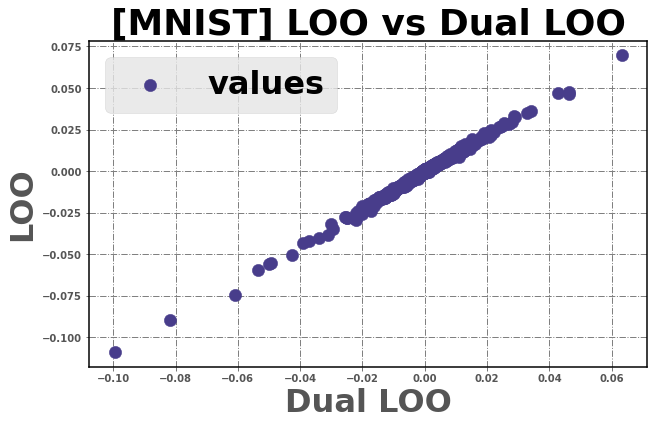

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import matplotlib as mpl

# Setting a larger default font size
mpl.rcParams.update({'font.size': 32, 'font.weight': 'bold'})
plt.style.use('ggplot')
# Initialize a list to keep all the correlation coefficients
cor_score_lst = []

# Loop through the files and perform the operations
for dual_file, loo_file in zip(dual_sorted_files, loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/mnist_removeone/' + dual_file
    loo_filename = './saved_scores/mnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(dual_loo_score, loo_score)
    cor_score_lst.append(correlation_coefficient)

    # Print the correlation coefficient
    print(f"Correlation Coefficient for {dual_file} vs {loo_file}: {correlation_coefficient}")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current Axes instance
    ax.set_facecolor('none')  # Removing background color
#     ax.spines['top'].set_color('none')
#     ax.spines['right'].set_color('none')

    # Making all spines visible to create a box
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)
        
    # Making grid lines visible
    ax.grid(True, which='both', axis='both', color='grey', linestyle='-.', linewidth=1.0)

    # Scatter plot adjustments
    plt.scatter(dual_loo_score, loo_score, c='darkslateblue', marker='o', s=150, label='values')  # Changed color to darkslateblue
    plt.xlabel('Dual LOO', fontsize=32, fontweight='bold')
    plt.ylabel('LOO', fontsize=32, fontweight='bold')
    plt.title('[MNIST] LOO vs Dual LOO', fontsize=36, fontweight='bold')
    
    # Adjusting legend
    plt.legend(prop={'size': 32, 'weight': 'bold'})
    plt.show()  # Show the plot

Pearson Correlation Coefficient for dual_loo_score_4008.npy vs loo_score_4008.npy: 0.9966236086902902
Spearman Correlation Coefficient for dual_loo_score_4008.npy vs loo_score_4008.npy: 0.9161614279185627


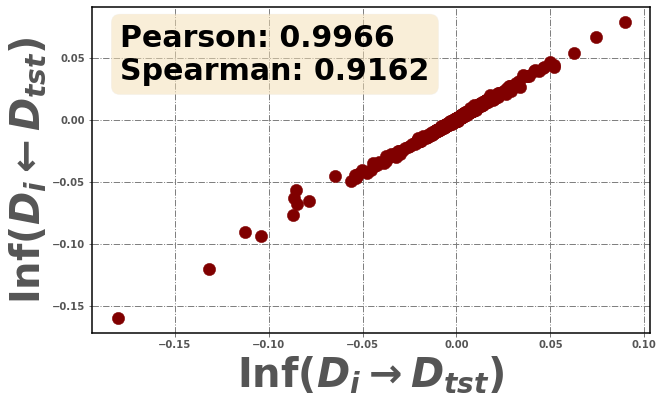

Pearson Correlation Coefficient for dual_loo_score_2049.npy vs loo_score_2049.npy: 0.9970661236892624
Spearman Correlation Coefficient for dual_loo_score_2049.npy vs loo_score_2049.npy: 0.8857095293285678


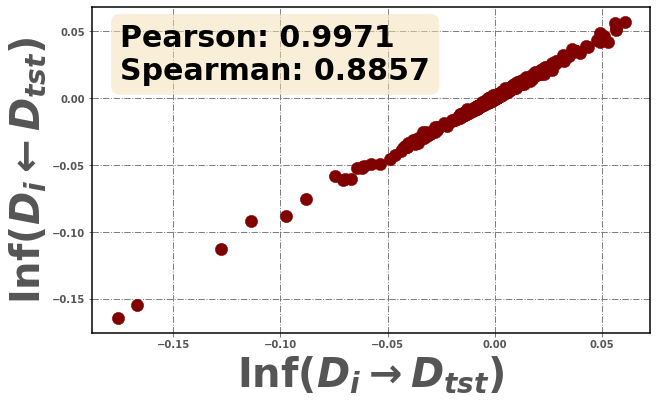

Pearson Correlation Coefficient for dual_loo_score_1707.npy vs loo_score_1707.npy: 0.997723718426261
Spearman Correlation Coefficient for dual_loo_score_1707.npy vs loo_score_1707.npy: 0.9414645783404569


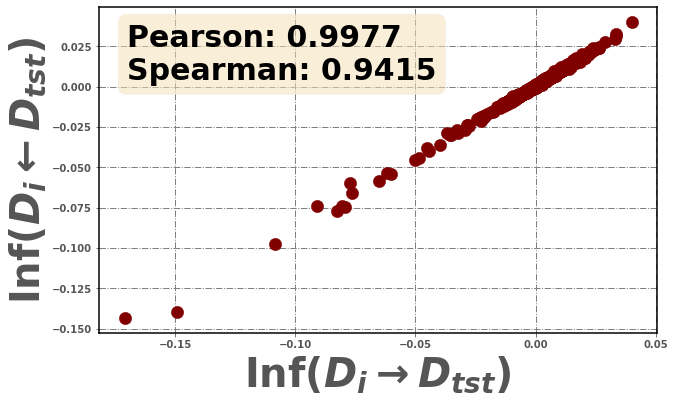

Pearson Correlation Coefficient for dual_loo_score_4155.npy vs loo_score_4155.npy: 0.9978889865524916
Spearman Correlation Coefficient for dual_loo_score_4155.npy vs loo_score_4155.npy: 0.8974337809367314


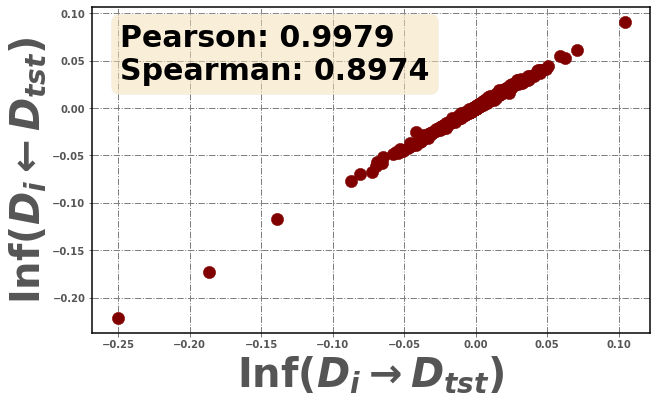

Pearson Correlation Coefficient for dual_loo_score_3625.npy vs loo_score_3625.npy: 0.9986095864415052
Spearman Correlation Coefficient for dual_loo_score_3625.npy vs loo_score_3625.npy: 0.9150845990013899


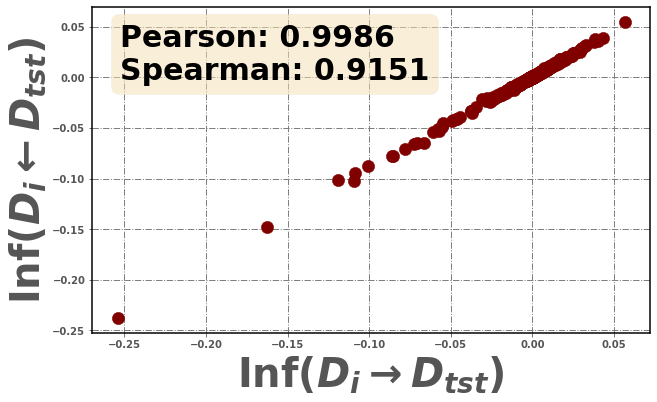

Pearson Correlation Coefficient for dual_loo_score_786.npy vs loo_score_786.npy: 0.9978337805580555
Spearman Correlation Coefficient for dual_loo_score_786.npy vs loo_score_786.npy: 0.9191061697389712


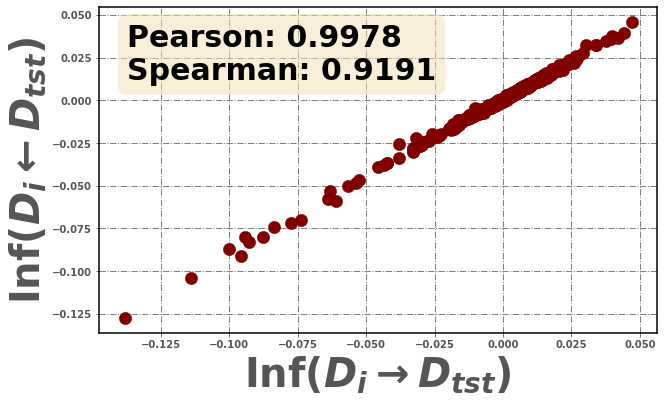

Pearson Correlation Coefficient for dual_loo_score_1882.npy vs loo_score_1882.npy: 0.9976776832649283
Spearman Correlation Coefficient for dual_loo_score_1882.npy vs loo_score_1882.npy: 0.854905159627666


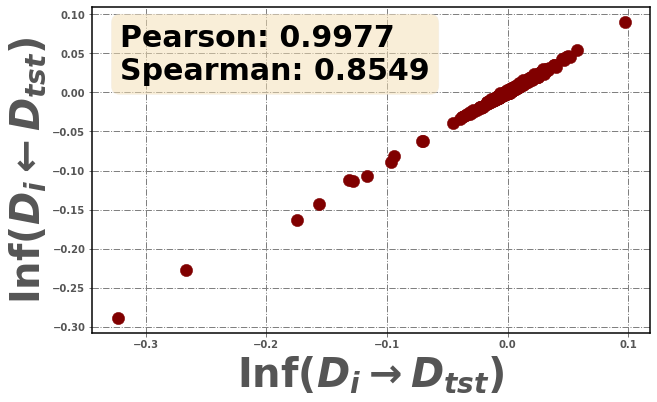

Pearson Correlation Coefficient for dual_loo_score_4780.npy vs loo_score_4780.npy: 0.9978805979860899
Spearman Correlation Coefficient for dual_loo_score_4780.npy vs loo_score_4780.npy: 0.8793419716000617


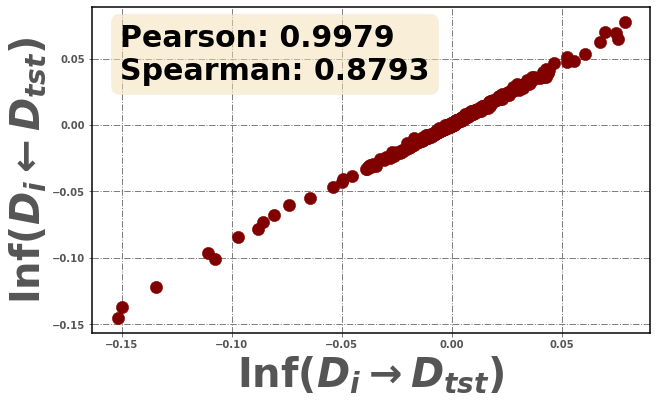

Pearson Correlation Coefficient for dual_loo_score_2025.npy vs loo_score_2025.npy: 0.9966088416651852
Spearman Correlation Coefficient for dual_loo_score_2025.npy vs loo_score_2025.npy: 0.9024701931516964


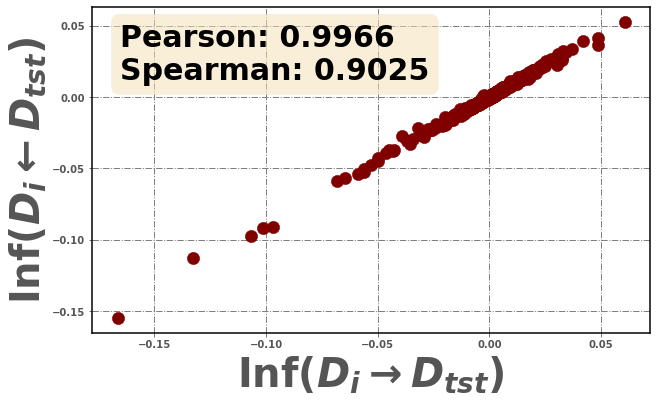

Pearson Correlation Coefficient for dual_loo_score_1251.npy vs loo_score_1251.npy: 0.9966925169773168
Spearman Correlation Coefficient for dual_loo_score_1251.npy vs loo_score_1251.npy: 0.9149138637054112


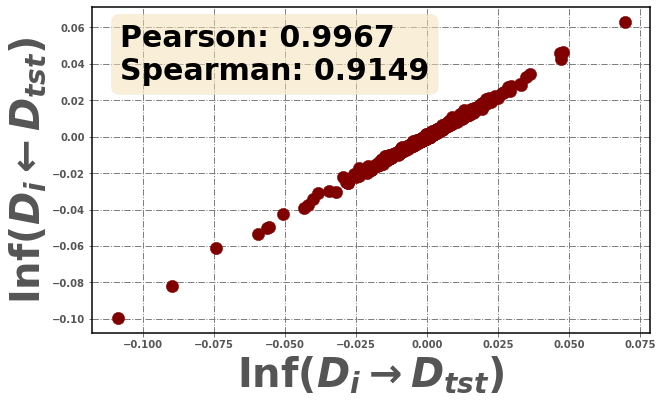

In [14]:
# Setting a larger default font size
mpl.rcParams.update({'font.size': 40, 'font.weight': 'bold'})
plt.style.use('ggplot')

# Initialize a list to keep all the correlation coefficients
cor_score_lst = []

# Loop through the files and perform the operations
for dual_file, loo_file in zip(dual_sorted_files, loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/mnist_removeone/' + dual_file
    loo_filename = './saved_scores/mnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficients
    pearson_corr, _ = pearsonr(loo_score, dual_loo_score)
    spearman_corr, _ = spearmanr(loo_score, dual_loo_score)
    cor_score_lst.append(pearson_corr)

    # Print the correlation coefficients
    print(f"Pearson Correlation Coefficient for {dual_file} vs {loo_file}: {pearson_corr}")
    print(f"Spearman Correlation Coefficient for {dual_file} vs {loo_file}: {spearman_corr}")

    # Scatter plot setup
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_facecolor('none')

    # Spine and grid setup
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)
    ax.grid(True, which='both', axis='both', color='grey', linestyle='-.', linewidth=1.0)

    # Scatter plot
    plt.scatter(loo_score, dual_loo_score, c='maroon', marker='o', s=150, label='values')

    # Axis labels
    plt.xlabel(r'Inf($D_i \rightarrow D_{tst}$)', fontsize=40, fontweight='bold')
    plt.ylabel(r'Inf($D_i \leftarrow D_{tst}$)', fontsize=40, fontweight='bold')

    # Display correlation coefficients in a box with 4 decimal points
    info_text = f'Pearson: {pearson_corr:.4f}\nSpearman: {spearman_corr:.4f}'
    plt.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=30,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Show plot
    plt.show()


In [15]:
# Initialize a list to keep all the correlation coefficients
cor_score_lst = []
cor_score_lst_spearman = []
# Loop through the files and perform the operations
from scipy.stats import spearmanr

# Loop through the files and perform the operations
for dual_file, loo_file in zip(fmnist_dual_sorted_files, fmnist_loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/fmnist_removeone/' + dual_file
    loo_filename = './saved_scores/fmnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(dual_loo_score, loo_score)
    cor_score_lst.append(correlation_coefficient)
    spearman_corr, _ = spearmanr(dual_loo_score, loo_score)
    cor_score_lst_spearman.append(spearman_corr)

    # Print the correlation coefficient
    print(f"Correlation Coefficient for {dual_file} vs {loo_file}: {correlation_coefficient}")

    # scatter plot
    plt.scatter(dual_loo_score, loo_score, c='0.6', marker='o', label='values')
    plt.xlabel('Dual LOO')
    plt.ylabel('LOO')
    plt.title(f'LOO vs Dual LOO for {dual_file} and {loo_file}')
    plt.legend()
    
    # Save the plot
    plot_filename = f'./saved_figures/convex_fmnist_loo_vs_dualloo_plot_{dual_file}.png'
    plt.savefig(plot_filename)
    plt.close()

# Calculate the average correlation coefficient over all samples
average_correlation = np.mean(cor_score_lst)
print("Average Correlation Coefficient:", average_correlation)
average_spearman_correlation = np.mean(cor_score_lst_spearman)
print("Average Correlation Coefficient:", average_spearman_correlation)

Correlation Coefficient for dual_loo_score_4999.npy vs loo_score_4999.npy: 0.9887098791362277
Correlation Coefficient for dual_loo_score_4102.npy vs loo_score_4102.npy: 0.9819218732167746
Correlation Coefficient for dual_loo_score_4120.npy vs loo_score_4120.npy: 0.9960843248014528
Correlation Coefficient for dual_loo_score_3834.npy vs loo_score_3834.npy: 0.9965072063297911
Correlation Coefficient for dual_loo_score_2390.npy vs loo_score_2390.npy: 0.9966919217448826
Correlation Coefficient for dual_loo_score_1415.npy vs loo_score_1415.npy: 0.9943017598933779
Correlation Coefficient for dual_loo_score_4117.npy vs loo_score_4117.npy: 0.9948856000475462
Correlation Coefficient for dual_loo_score_137.npy vs loo_score_137.npy: 0.9966642147432487
Correlation Coefficient for dual_loo_score_1728.npy vs loo_score_1728.npy: 0.9986532263986712
Correlation Coefficient for dual_loo_score_1652.npy vs loo_score_1652.npy: 0.9943837131197211
Average Correlation Coefficient: 0.9938803719431692
Average Co

Correlation Coefficient for dual_loo_score_4999.npy vs loo_score_4999.npy: 0.9887098791362277 0.701776070197815


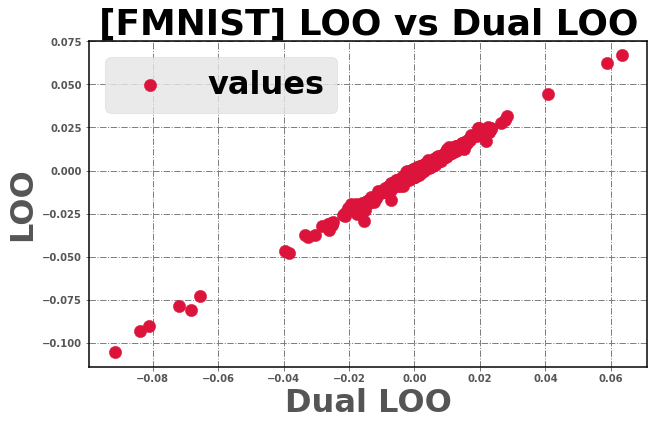

Correlation Coefficient for dual_loo_score_4102.npy vs loo_score_4102.npy: 0.9819218732167746 0.5929191579129772


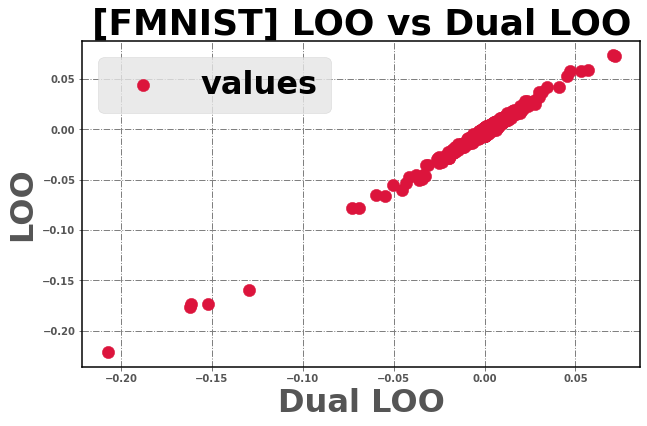

Correlation Coefficient for dual_loo_score_4120.npy vs loo_score_4120.npy: 0.9960843248014528 0.8054099614829604


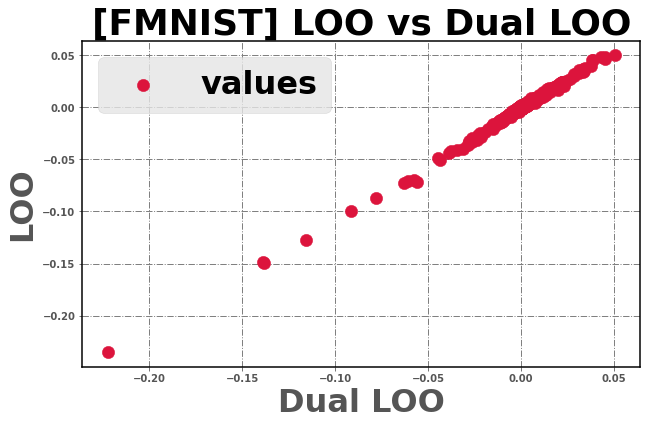

Correlation Coefficient for dual_loo_score_3834.npy vs loo_score_3834.npy: 0.9965072063297911 0.8268751186638905


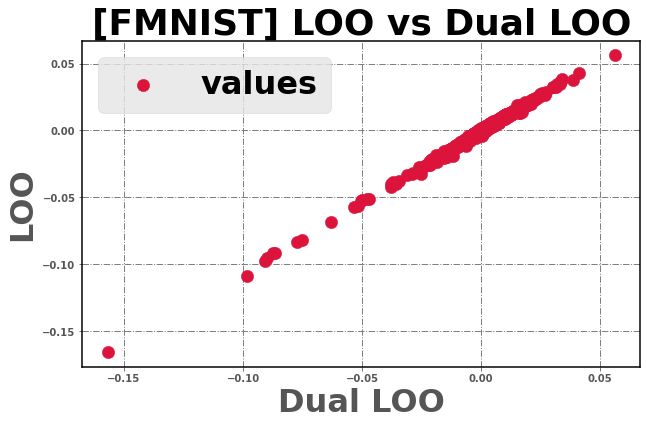

Correlation Coefficient for dual_loo_score_2390.npy vs loo_score_2390.npy: 0.9966919217448826 0.7268968934185142


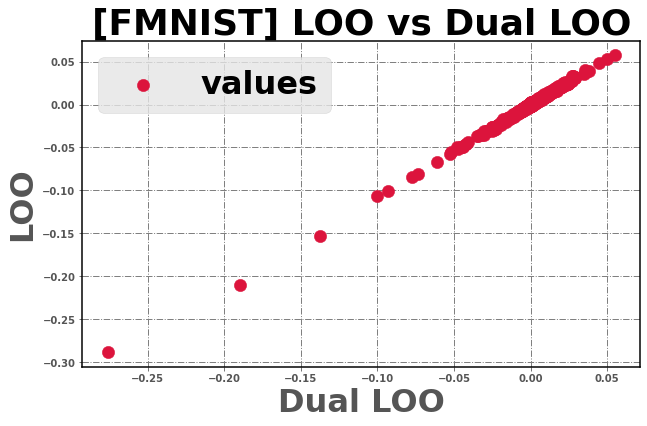

Correlation Coefficient for dual_loo_score_1415.npy vs loo_score_1415.npy: 0.9943017598933779 0.6904002813705291


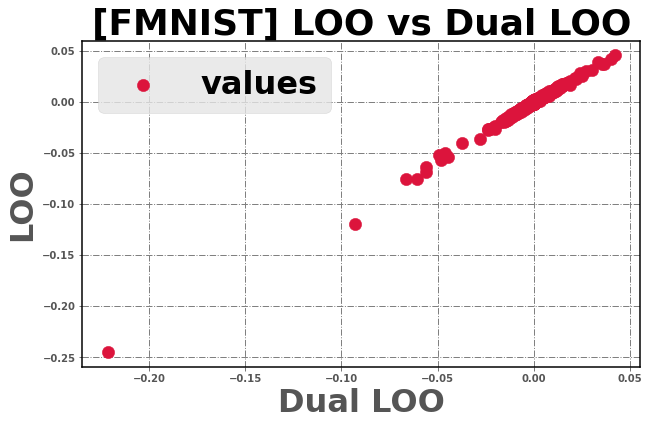

Correlation Coefficient for dual_loo_score_4117.npy vs loo_score_4117.npy: 0.9948856000475462 0.8033719648490222


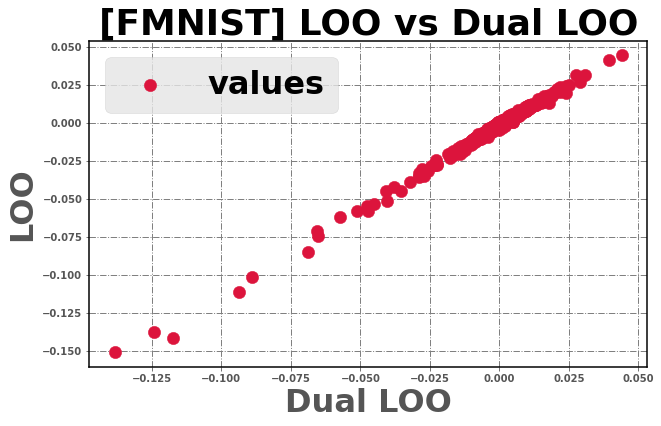

Correlation Coefficient for dual_loo_score_137.npy vs loo_score_137.npy: 0.9966642147432487 0.6789928538879632


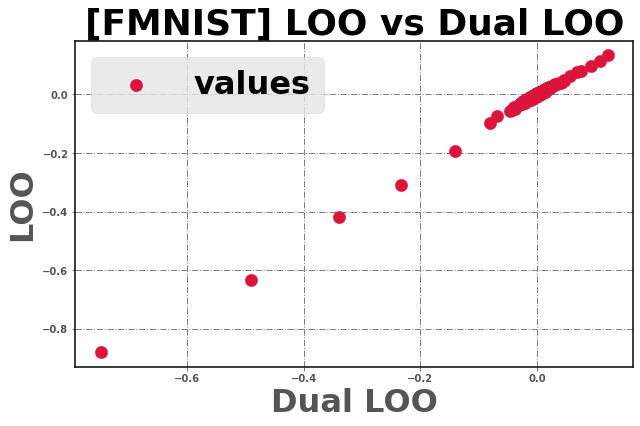

Correlation Coefficient for dual_loo_score_1728.npy vs loo_score_1728.npy: 0.9986532263986712 0.835533997689029


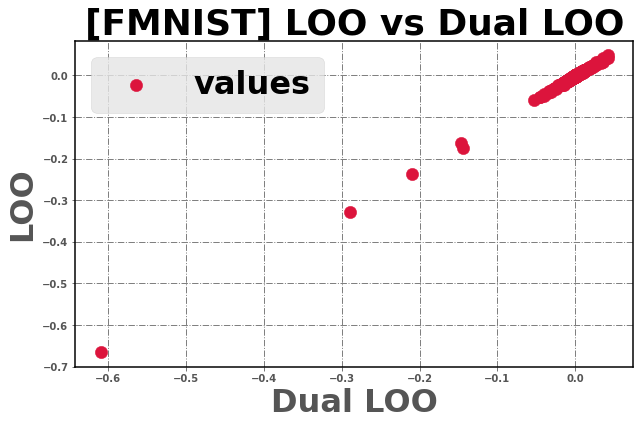

Correlation Coefficient for dual_loo_score_1652.npy vs loo_score_1652.npy: 0.9943837131197211 0.6122463642870503


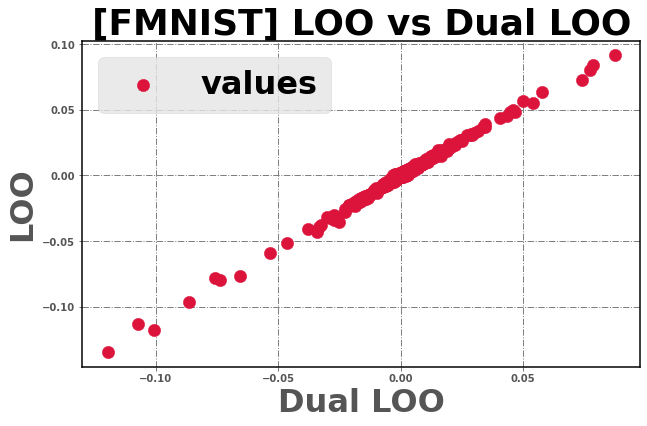

In [16]:
# Setting a larger default font size
mpl.rcParams.update({'font.size': 32, 'font.weight': 'bold'})
plt.style.use('ggplot')
# plt.style.use('ggplot') 
# Initialize a list to keep all the correlation coefficients
cor_score_lst = []

# Loop through the files and perform the operations
for dual_file, loo_file in zip(fmnist_dual_sorted_files, fmnist_loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/fmnist_removeone/' + dual_file
    loo_filename = './saved_scores/fmnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(dual_loo_score, loo_score)
    cor_score_lst.append(correlation_coefficient)
    spearman_corr, _ = spearmanr(dual_loo_score, loo_score)
    cor_score_lst_spearman.append(spearman_corr)

    # Print the correlation coefficient
    print(f"Correlation Coefficient for {dual_file} vs {loo_file}: {correlation_coefficient} {spearman_corr}")

    # Scatter plot
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Get the current Axes instance
    ax.set_facecolor('none')  # Removing background color
#     ax.spines['top'].set_color('none')
#     ax.spines['right'].set_color('none')

    # Making all spines visible to create a box
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)
        
    # Making grid lines visible
    ax.grid(True, which='both', axis='both', color='grey', linestyle='-.', linewidth=1.0)

    # Scatter plot adjustments
    plt.scatter(dual_loo_score, loo_score, c='crimson', marker='o', s=150, label='values')  # Changed color to darkslateblue
    plt.xlabel('Dual LOO', fontsize=32, fontweight='bold')
    plt.ylabel('LOO', fontsize=32, fontweight='bold')
    plt.title('[FMNIST] LOO vs Dual LOO', fontsize=36, fontweight='bold')
    
    # Adjusting legend
    plt.legend(prop={'size': 32, 'weight': 'bold'})
    plt.show()  # Show the plot

Pearson Correlation Coefficient for dual_loo_score_4999.npy vs loo_score_4999.npy: 0.9887098791362277
Spearman Correlation Coefficient for dual_loo_score_4999.npy vs loo_score_4999.npy: 0.701776070197815


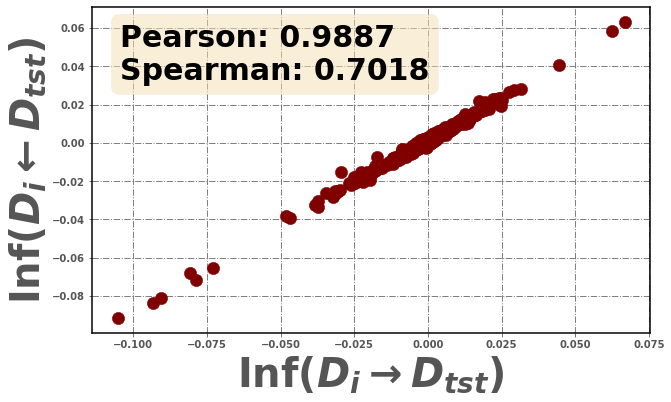

Pearson Correlation Coefficient for dual_loo_score_4102.npy vs loo_score_4102.npy: 0.9819218732167746
Spearman Correlation Coefficient for dual_loo_score_4102.npy vs loo_score_4102.npy: 0.5929191579129772


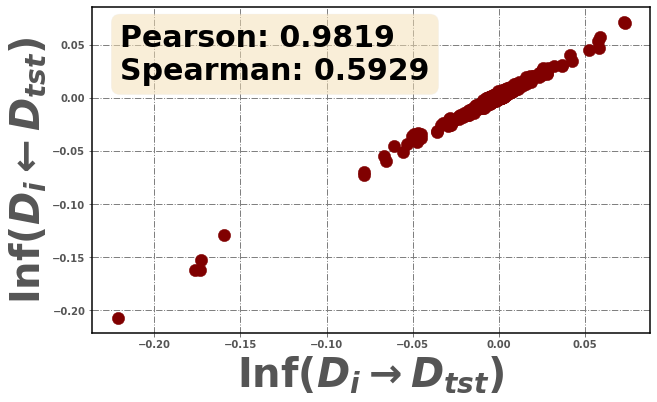

Pearson Correlation Coefficient for dual_loo_score_4120.npy vs loo_score_4120.npy: 0.9960843248014528
Spearman Correlation Coefficient for dual_loo_score_4120.npy vs loo_score_4120.npy: 0.8054099614829604


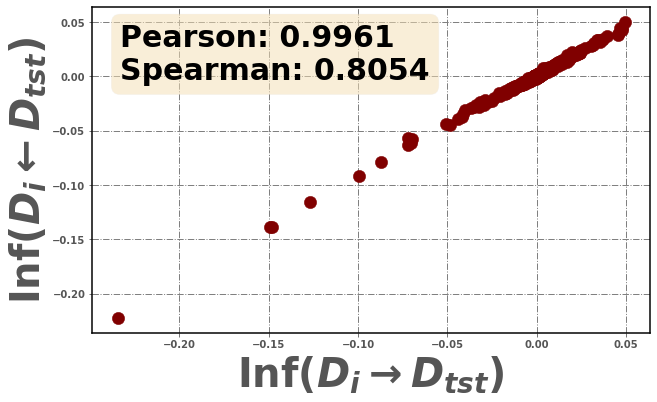

Pearson Correlation Coefficient for dual_loo_score_3834.npy vs loo_score_3834.npy: 0.9965072063297911
Spearman Correlation Coefficient for dual_loo_score_3834.npy vs loo_score_3834.npy: 0.8268751186638905


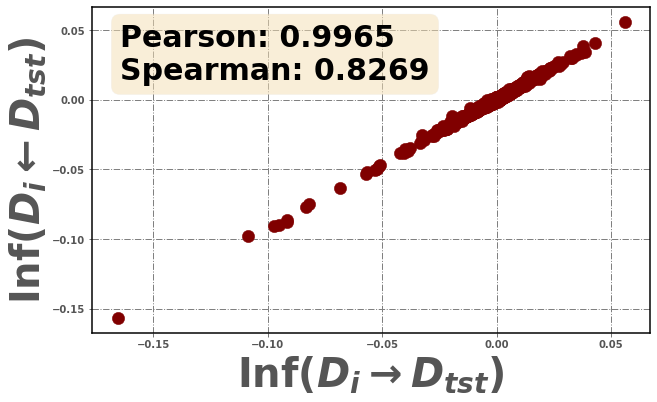

Pearson Correlation Coefficient for dual_loo_score_2390.npy vs loo_score_2390.npy: 0.9966919217448826
Spearman Correlation Coefficient for dual_loo_score_2390.npy vs loo_score_2390.npy: 0.7268968934185142


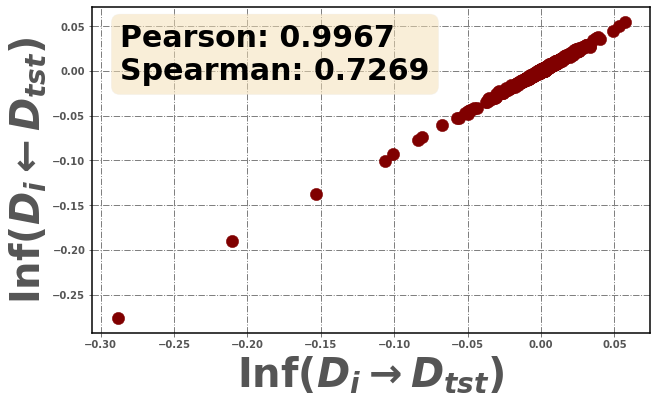

Pearson Correlation Coefficient for dual_loo_score_1415.npy vs loo_score_1415.npy: 0.9943017598933779
Spearman Correlation Coefficient for dual_loo_score_1415.npy vs loo_score_1415.npy: 0.6904002813705291


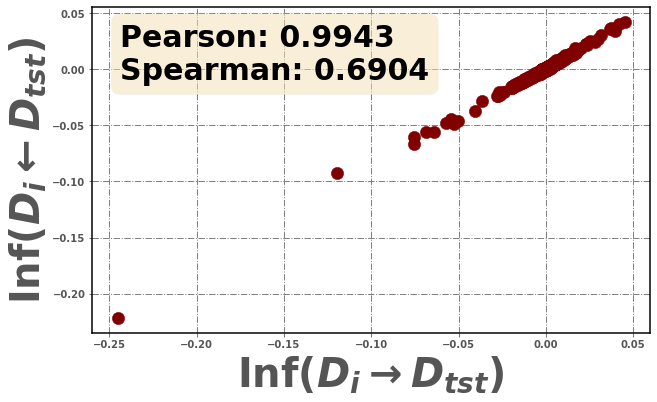

Pearson Correlation Coefficient for dual_loo_score_4117.npy vs loo_score_4117.npy: 0.9948856000475462
Spearman Correlation Coefficient for dual_loo_score_4117.npy vs loo_score_4117.npy: 0.8033719648490222


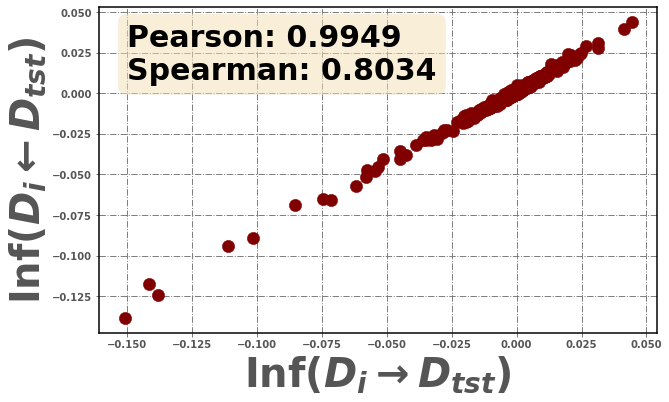

Pearson Correlation Coefficient for dual_loo_score_137.npy vs loo_score_137.npy: 0.9966642147432487
Spearman Correlation Coefficient for dual_loo_score_137.npy vs loo_score_137.npy: 0.6789928538879632


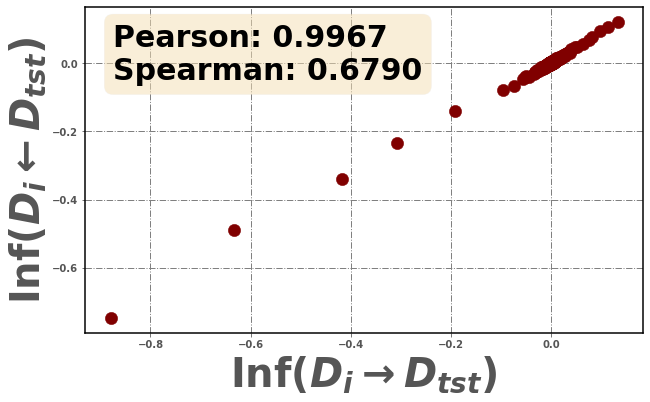

Pearson Correlation Coefficient for dual_loo_score_1728.npy vs loo_score_1728.npy: 0.9986532263986712
Spearman Correlation Coefficient for dual_loo_score_1728.npy vs loo_score_1728.npy: 0.835533997689029


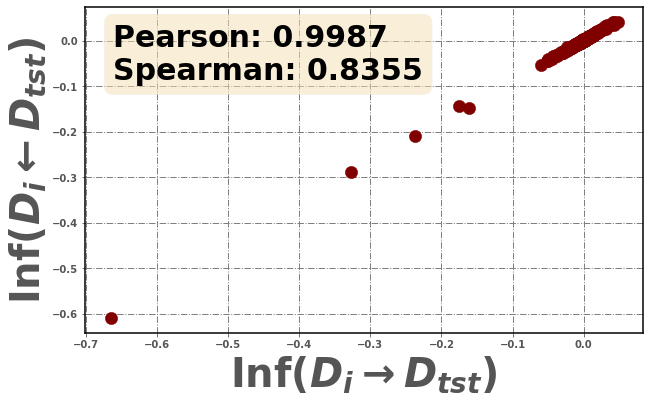

Pearson Correlation Coefficient for dual_loo_score_1652.npy vs loo_score_1652.npy: 0.9943837131197211
Spearman Correlation Coefficient for dual_loo_score_1652.npy vs loo_score_1652.npy: 0.6122463642870503


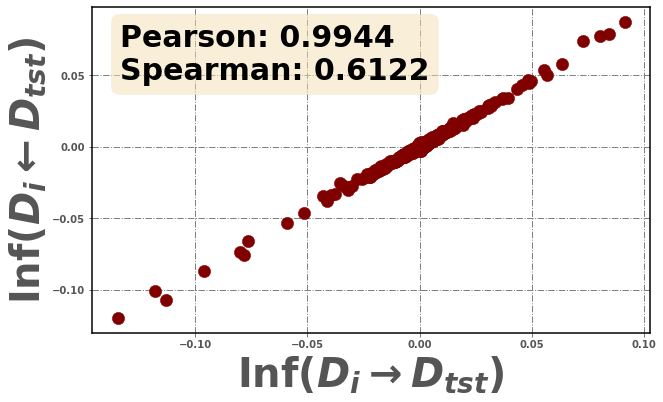

In [17]:
# Setting a larger default font size
mpl.rcParams.update({'font.size': 40, 'font.weight': 'bold'})
plt.style.use('ggplot')

# Initialize a list to keep all the correlation coefficients
cor_score_lst = []

# Loop through the files and perform the operations
for dual_file, loo_file in zip(fmnist_dual_sorted_files, fmnist_loo_sorted_files):
    # Load the files
    dual_filename = './saved_scores/fmnist_removeone/' + dual_file
    loo_filename = './saved_scores/fmnist_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
  
    # Calculate the correlation coefficients
    pearson_corr, _ = pearsonr(loo_score, dual_loo_score)
    spearman_corr, _ = spearmanr(loo_score, dual_loo_score)
    cor_score_lst.append(pearson_corr)

    # Print the correlation coefficients
    print(f"Pearson Correlation Coefficient for {dual_file} vs {loo_file}: {pearson_corr}")
    print(f"Spearman Correlation Coefficient for {dual_file} vs {loo_file}: {spearman_corr}")

    # Scatter plot setup
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_facecolor('none')

    # Spine and grid setup
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)
    ax.grid(True, which='both', axis='both', color='grey', linestyle='-.', linewidth=1.0)

    # Scatter plot
    plt.scatter(loo_score, dual_loo_score, c='maroon', marker='o', s=150, label='values')

    # Axis labels
    plt.xlabel(r'Inf($D_i \rightarrow D_{tst}$)', fontsize=40, fontweight='bold')
    plt.ylabel(r'Inf($D_i \leftarrow D_{tst}$)', fontsize=40, fontweight='bold')

    # Display correlation coefficients in a box with 4 decimal points
    info_text = f'Pearson: {pearson_corr:.4f}\nSpearman: {spearman_corr:.4f}'
    plt.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=30,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Show plot
    plt.show()


In [ ]:
# Initialize a list to keep all the correlation coefficients
cor_score_lst = []
cor_score_lst_spearman = []
# Loop through the files and perform the operations
from scipy.stats import spearmanr


# Loop through the files and perform the operations
for dual_file, loo_file in zip(cifar10_dual_files, cifar10_loo_files):
    # Load the files
    dual_filename = './saved_scores/cifar10_removeone/' + dual_file
    loo_filename = './saved_scores/cifar10_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
    
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(dual_loo_score, loo_score)
    cor_score_lst.append(correlation_coefficient)
    spearman_corr, _ = spearmanr(dual_loo_score, loo_score)
    cor_score_lst_spearman.append(spearman_corr)

    # Print the correlation coefficient
    print(f"Correlation Coefficient for {dual_file} vs {loo_file}: {correlation_coefficient}")

    # scatter plot
    plt.scatter(dual_loo_score, loo_score, c='0.6', marker='o', label='values')
    plt.xlabel('Dual LOO')
    plt.ylabel('LOO')
    plt.title(f'LOO vs Dual LOO for {dual_file} and {loo_file}')
    plt.legend()
    
    # Save the plot
    plot_filename = f'./saved_figures/convex_cifar10_loo_vs_dualloo_plot_{dual_file}.png'
    plt.savefig(plot_filename)
    plt.close()

# Calculate the average correlation coefficient over all samples
average_correlation = np.mean(cor_score_lst)
print("Average Correlation Coefficient:", average_correlation)
average_spearman_correlation = np.mean(cor_score_lst_spearman)
print("Average Correlation Coefficient:", average_spearman_correlation)

In [ ]:
# Setting a larger default font size
mpl.rcParams.update({'font.size': 40, 'font.weight': 'bold'})
plt.style.use('ggplot')

# Initialize a list to keep all the correlation coefficients
cor_score_lst = []

# Loop through the files and perform the operations
for dual_file, loo_file in zip(cifar10_dual_files, cifar10_loo_files):
    # Load the files
    dual_filename = './saved_scores/cifar10_removeone/' + dual_file
    loo_filename = './saved_scores/cifar10_removeone/' + loo_file    
    dual_loo_score = np.load(dual_filename)
    loo_score = np.load(loo_filename)
    loo_score = -loo_score
  
    # Calculate the correlation coefficients
    pearson_corr, _ = pearsonr(loo_score, dual_loo_score)
    spearman_corr, _ = spearmanr(loo_score, dual_loo_score)
    cor_score_lst.append(pearson_corr)

    # Print the correlation coefficients
    print(f"Pearson Correlation Coefficient for {dual_file} vs {loo_file}: {pearson_corr}")
    print(f"Spearman Correlation Coefficient for {dual_file} vs {loo_file}: {spearman_corr}")

    # Scatter plot setup
    plt.figure(figsize=(10, 6))
    ax = plt.gca()
    ax.set_facecolor('none')

    # Spine and grid setup
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)
    ax.grid(True, which='both', axis='both', color='grey', linestyle='-.', linewidth=1.0)

    # Scatter plot
    plt.scatter(loo_score, dual_loo_score, c='maroon', marker='o', s=150, label='values')

    # Axis labels
    plt.xlabel(r'Inf($D_i \rightarrow D_{tst}$)', fontsize=40, fontweight='bold')
    plt.ylabel(r'Inf($D_i \leftarrow D_{tst}$)', fontsize=40, fontweight='bold')

    # Display correlation coefficients in a box with 4 decimal points
    info_text = f'Pearson: {pearson_corr:.4f}\nSpearman: {spearman_corr:.4f}'
    plt.text(0.05, 0.95, info_text, transform=ax.transAxes, fontsize=30,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # Show plot
    plt.show()
